In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime,timedelta
import yfinance as yf 
from nselib import capital_market 
import os 
from lightweight_charts import Chart
import vectorbt as vbt 
from tabulate import tabulate 
from tqdm import tqdm
import talib as ta 
import time 
from IPython.display import display
import ipywidgets as ipy
from scipy import stats
import plotly.graph_objects as go
from scipy.stats import norm
sns.set_style('darkgrid')
plt.style.use('ggplot')

In [47]:
os.getcwd()
if not os.path.exists("data-1d"):
    os.mkdir('data-1d')
else:
    print("Folder present")

Folder present


In [48]:
#getting All symbols
nifty_50=capital_market.nifty50_equity_list()['Symbol']
a=[[i] for i in nifty_50]
head=['index','symbols']
print(tabulate(a, headers=head, tablefmt="fancy_grid",showindex=True))


╒═════════╤════════════╕
│   index │ symbols    │
╞═════════╪════════════╡
│       0 │ ADANIENT   │
├─────────┼────────────┤
│       1 │ ADANIPORTS │
├─────────┼────────────┤
│       2 │ APOLLOHOSP │
├─────────┼────────────┤
│       3 │ ASIANPAINT │
├─────────┼────────────┤
│       4 │ AXISBANK   │
├─────────┼────────────┤
│       5 │ BAJAJ-AUTO │
├─────────┼────────────┤
│       6 │ BAJFINANCE │
├─────────┼────────────┤
│       7 │ BAJAJFINSV │
├─────────┼────────────┤
│       8 │ BPCL       │
├─────────┼────────────┤
│       9 │ BHARTIARTL │
├─────────┼────────────┤
│      10 │ BRITANNIA  │
├─────────┼────────────┤
│      11 │ CIPLA      │
├─────────┼────────────┤
│      12 │ COALINDIA  │
├─────────┼────────────┤
│      13 │ DIVISLAB   │
├─────────┼────────────┤
│      14 │ DRREDDY    │
├─────────┼────────────┤
│      15 │ EICHERMOT  │
├─────────┼────────────┤
│      16 │ GRASIM     │
├─────────┼────────────┤
│      17 │ HCLTECH    │
├─────────┼────────────┤
│      18 │ HDFCBANK   │


In [49]:
class download_symb:
    def __init__(self,symbol):
        self.symbol=symbol
    def symb(self):
        end_date=datetime.now().date()
        start_date=end_date-timedelta(days=252)
        try:
            #data_sym=yf.download(f'{self.symbol}.NS',start=start_date,end=end_date,period='1d')#interval="1m" )
            #self.data=data_sym.to_parquet(f'data-1d/{self.symbol}.parquet')
            self.data=pd.read_parquet(f'data-1d/{self.symbol}.parquet')            
        except Exception as e:
            print("File not downloaded")
        return(self.data)
    def analysis(self):
        self.close=self.data['Close']
        self.data_returns=np.log(self.close).diff()
        return
        

In [50]:
data=download_symb(nifty_50[0])
data.symb()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-22,2425.100098,2449.949951,2360.000000,2397.250000,2396.052979,8459191
2023-06-23,2392.300049,2392.300049,2163.300049,2233.550049,2232.434570,15213238
2023-06-26,2210.050049,2336.449951,2173.050049,2295.600098,2294.453857,7847341
2023-06-27,2328.949951,2343.850098,2271.000000,2284.449951,2283.309082,3361053
2023-06-28,2300.000000,2418.600098,2293.850098,2402.000000,2400.800537,28353193
...,...,...,...,...,...,...
2024-02-22,3239.000000,3274.000000,3210.500000,3263.050049,3263.050049,1138722
2024-02-23,3263.050049,3319.949951,3225.100098,3273.300049,3273.300049,1975035
2024-02-26,3272.000000,3344.000000,3263.000000,3327.750000,3327.750000,1695378


In [51]:
def plot_close(cl):
    data=download_symb(cl)
    data.symb()
    data.analysis()
    data.close.plot()
select=ipy.Dropdown(options=(nifty_50))
ipy.interact(plot_close,cl=nifty_50);

interactive(children=(Dropdown(description='cl', options=('ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT'…

In [87]:
    
def plot_candel(cl):
    data=download_symb(cl)
    data.symb()
    dfpl=data.data
    fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])
    fig.update_layout(
    autosize=False,
    width=1000,
    height=800, 
    paper_bgcolor='black',
    plot_bgcolor='black',
    xaxis=dict(gridcolor='grey'),
    yaxis=dict(gridcolor='grey')
    )
    #fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",marker=dict(size=8, color="MediumPurple"),name="Signal")
    fig.show();
select=ipy.Dropdown(options=(nifty_50))
ipy.interact(plot_candel,cl=select);

interactive(children=(Dropdown(description='cl', options=('ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT'…

In [54]:
daily_returns={}
for i in tqdm(range(0,len(nifty_50))):
    try:
        data=download_symb(nifty_50[i])
        data.symb()
        data.analysis()
        daily_returns[nifty_50[i]]=data.data_returns
        
    except Exception as e:
        continue

100%|██████████| 50/50 [00:00<00:00, 178.41it/s]


In [55]:
daily_returns=pd.DataFrame(daily_returns)
daily_returns.dropna(inplace=True)
daily_returns.head()

,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-23,-0.070730,-0.042886,-0.004065,0.015170,-0.008519,0.002274,-0.005756,-0.003788,-0.037658,0.014138,...,0.001161,-0.006863,-0.001248,-0.017184,-0.013593,-0.003177,-0.010526,-0.011258,-0.010164,-0.006166
2023-06-26,0.027402,0.014041,-0.001686,0.003164,0.002241,-0.003402,0.001294,0.003722,-0.003622,-0.003340,...,0.003524,-0.008336,0.025480,0.014546,0.002278,-0.003232,0.011317,0.018351,0.010697,0.002497
2023-06-27,-0.004869,-0.005745,0.020797,0.005381,0.013135,0.002417,0.002932,0.010163,0.005705,0.015086,...,0.006861,0.002411,-0.009728,0.009203,0.008160,0.006990,0.001042,-0.007166,0.005056,0.004453
2023-06-28,0.050176,0.049104,-0.003096,0.006667,0.005073,0.021052,0.010057,-0.002696,0.013917,0.008405,...,0.019767,0.005645,0.000878,0.023368,0.007198,-0.010414,0.017456,0.008858,0.006333,-0.002355
2023-06-30,-0.005825,-0.023066,-0.005614,0.004113,0.009412,-0.005262,0.009880,0.006006,-0.001917,0.007482,...,0.028747,0.026637,0.006935,0.015057,0.004026,0.020323,0.006435,0.010527,0.004119,0.019330


In [56]:
def plotting(symb):
    daily_returns.loc[:,symb].plot(color='blue')
    plt.title("DAILY RETURNS")
    plt.axhline(y=0,color='black')
select=ipy.Dropdown(options=(nifty_50))
ipy.interact(plotting,symb=nifty_50);

interactive(children=(Dropdown(description='symb', options=('ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAIN…

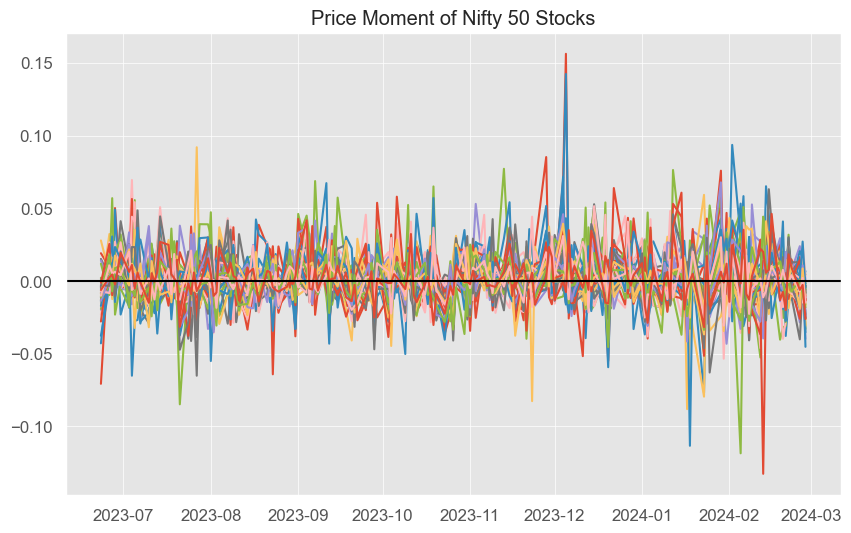

In [57]:
plt.plot(daily_returns)
plt.title("Price Moment of Nifty 50 Stocks")
plt.axhline(y=0,color='black');

In [58]:
daily_returns.describe()

,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,...,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,0.001744,0.003287,0.001348,-0.000890,0.000625,0.003397,-0.000465,0.000294,0.002897,0.001729,...,0.002741,0.001423,0.001937,0.003079,0.001400,0.000822,0.001129,-0.002063,0.001085,0.001794
std,0.023031,0.021017,0.014030,0.010894,0.012951,0.014823,0.014666,0.012775,0.019350,0.010982,...,0.010831,0.012561,0.011924,0.014075,0.014081,0.015931,0.011015,0.016164,0.012664,0.015321
min,-0.070730,-0.059313,-0.039788,-0.041278,-0.044690,-0.033014,-0.053472,-0.032449,-0.043116,-0.032904,...,-0.024141,-0.027814,-0.027671,-0.033171,-0.042624,-0.062951,-0.034440,-0.118533,-0.030683,-0.031732
25%,-0.009121,-0.007299,-0.006408,-0.003945,-0.007458,-0.005712,-0.008826,-0.007343,-0.008349,-0.003823,...,-0.003777,-0.005909,-0.006014,-0.006413,-0.006208,-0.007988,-0.005043,-0.009635,-0.007110,-0.006166
50%,0.001314,0.001435,0.000104,0.000482,0.000500,0.002329,-0.001365,0.000031,0.002631,0.000250,...,0.002200,0.000756,0.002067,0.000565,0.001896,0.000498,0.000623,-0.000334,0.001461,-0.000261
75%,0.009503,0.012291,0.009639,0.005909,0.010076,0.009460,0.006475,0.006091,0.012070,0.007929,...,0.007690,0.006651,0.008929,0.012971,0.009302,0.008021,0.008778,0.006681,0.006946,0.006638
max,0.156276,0.142384,0.053039,0.022136,0.037481,0.065042,0.069459,0.057992,0.093619,0.034315,...,0.033477,0.051484,0.043056,0.053237,0.038082,0.045874,0.028579,0.044167,0.040823,0.063926


In [66]:
stats.describe(daily_returns['ADANIENT'])

DescribeResult(nobs=169, minmax=(-0.07072997724189545, 0.1562762033254801), mean=0.0017440739956509866, variance=0.0005304182578484507, skewness=1.8548270167165688, kurtosis=12.671291792802693)

In [60]:
def statis(symb):
    nobs,minmax,mean,variance,skewness,kurtosis=stats.describe(daily_returns[symb])
    mini,maxi=minmax
    std=variance**0.5
    return(nobs,mini,maxi,mean,variance,skewness,kurtosis,std)

In [61]:
statis('ADANIENT')

(169,
 -0.07072997724189545,
 0.1562762033254801,
 0.0017440739956509866,
 0.0005304182578484507,
 1.8548270167165688,
 12.671291792802693,
 0.02303081105494226)